In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [9]:
df = pd.read_csv("pretest.csv",sep=',')

C:\Users\SeckinKintas\AppData\Local\Temp\ipykernel_19140\2090739073.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pretest.csv",sep=',')


<h1><center>EDA</center></h1>


In [10]:
df.head()

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


In [11]:
print("Number of Rows:", df.shape[0])
print("Date Range:", df.date.min(), "-" , df.date.max())

Number of Rows: 309903
Date Range: 2021-12-01 - 2021-12-31


In [12]:
#Null Rate per Column
df.isnull().mean()

visitor_id    0.000000
date          0.000000
email         0.899017
experiment    0.903070
group         0.903070
submitted     0.000000
dtype: float64

In [13]:
print("Total visitor count:", df["visitor_id"].nunique())
print("Sign-up Count:", df['submitted'].sum())
print("Sign-up Rate:",df['submitted'].mean().round(2))

Total visitor count: 309903
Sign-up Count: 31295
Sign-up Rate: 0.1


Text(0.5, 0, 'Date')

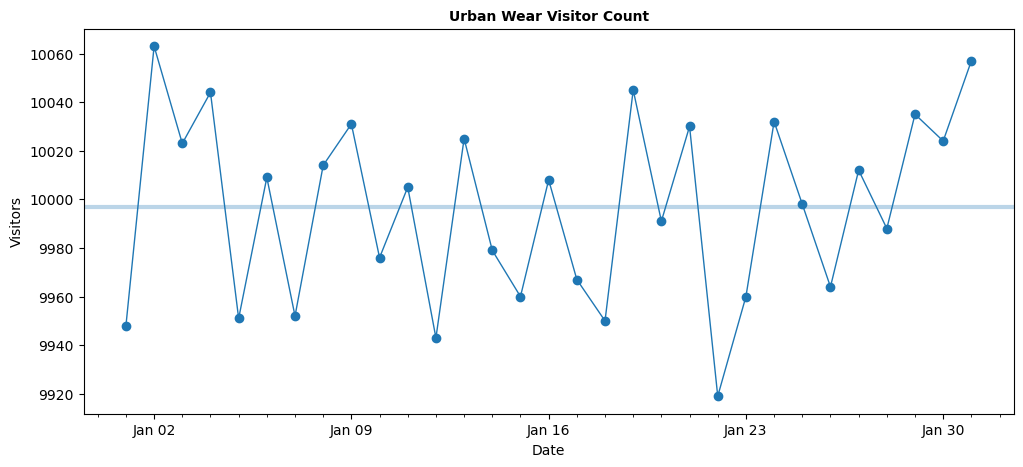

In [14]:
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

visits_per_day = df.groupby('date').submitted.count()
visits_mean = visits_per_day.mean()

# Plot the Data
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(visits_per_day.index, visits_per_day, '-o', color=c1, linewidth=1, label="Visits")
ax.axhline(visits_mean, color=c1, linestyle='-', linewidth=3, alpha=0.3, label="Visits (Mean)")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_title('Urban Wear Visitor Count', fontsize=10, weight="bold")
ax.set_ylabel('Visitors', fontsize=10)
ax.set_xlabel('Date', fontsize=10)

<h1><center> STATE THE HYPOTHESIS</center></h1>
 
The second step of the experiment is to state the hypothesis. This is followed by setting parameter values such as significance level (alpha), statistical power and minimum detectable effect (MDE)

**Ho**: The sign up rates of blue and green buttons are the same

**Ha**: The sign up rates of blue and green buttons are different

In [16]:
#Experiment Parameters
alpha = 0.05
power = 0.8
mde = 0.1


#Propportions if the effect exists
p1 = 0.1 #Control (Blue)
p2 = p1*(1+p1) #Treatment (Green)
